### Load the dataset

In [120]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Load dataset
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Understand the columns
1. UDI
* Unique identifier for each row/record.
2. Product ID
* ID of the product being manufactured.
3. Type
* Product type (categorical) → typically L, M, H (Low, Medium, High).
* Represents product variants.
4. Air temperature [K]
* Temperature of the surrounding air (in Kelvin).
* Higher/lower air temp can influence machine stress.
5. Process temperature [K]
* Temperature inside the process/machine (in Kelvin).
* Should generally be higher than air temperature.
* If difference is too high → can indicate overheating.
6. Rotational speed [rpm]
* Speed of machine rotation (revolutions per minute).
* Critical factor for wear/tear and performance.
7. Torque [Nm] (Rotational force applied by the machine)
* Torque applied (in Newton-meters).
* Higher torque → more mechanical stress.
8. Tool wear [min]
* Amount of wear of the tool (in minutes).
* The longer the tool is used, the higher the wear value.
9. Machine failure
* Target column (binary: 0 or 1).
* 1 → Machine failed during operation.
* 0 → No failure.
* This is what predictive maintenance models try to predict.
10. TWF (Tool Wear Failure)
* Subtype of failure caused by tool wear.
* Binary (0/1).
11. HDF (Heat Dissipation Failure)
* Failure caused by improper heat dissipation.
* Binary (0/1).
12. PWF (Power Failure)
* Failure due to power-related issues.
* Binary (0/1).
13. OSF (Overstrain Failure)
* Failure due to mechanical strain.
* Binary (0/1).
14. RNF (Random Failure)
* Failure caused by random/unclassified reasons.
* Binary (0/1).

### Explore the dataset

In [122]:
df.shape

(10000, 14)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [124]:
# check the count of target column
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

### Basic Data cleaning

In [125]:
# drop UDI and Product ID (clearly indicates no use in prediction)
df = df.drop(columns = ["UDI","Product ID"])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [126]:
# check the count of type column
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [127]:
# check target class balance
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

### EDA

* Data Quality and summary

In [128]:
# check missing values
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [129]:
# check duplicate records
df.duplicated().sum()

0

In [130]:
# statistical summary
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


* Target Variable Exploration

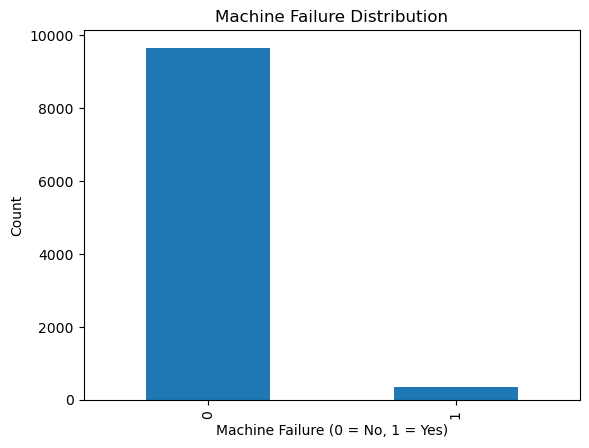

In [131]:
# Machine Failure Distribution
df["Machine failure"].value_counts().plot(kind="bar")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Machine Failure Distribution")
plt.show()

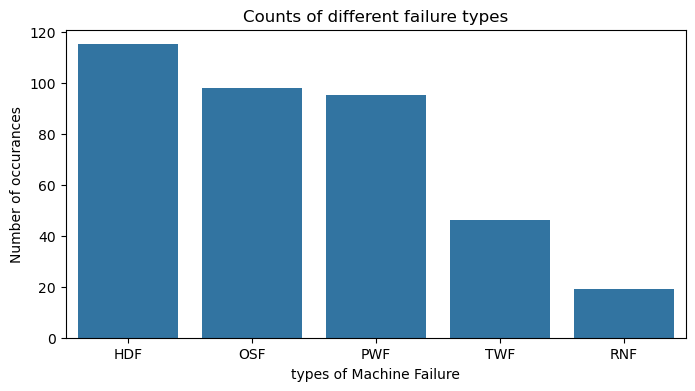

In [132]:
# Failure types (TWF,HDF,PWF,OSF,RNF)
failure_cols = ["TWF","HDF","PWF","OSF","RNF"]
counts = df[failure_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel("types of Machine Failure")
plt.ylabel("Number of occurances")
plt.title("Counts of different failure types")
plt.show()

* Univariate Analysis

In [133]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

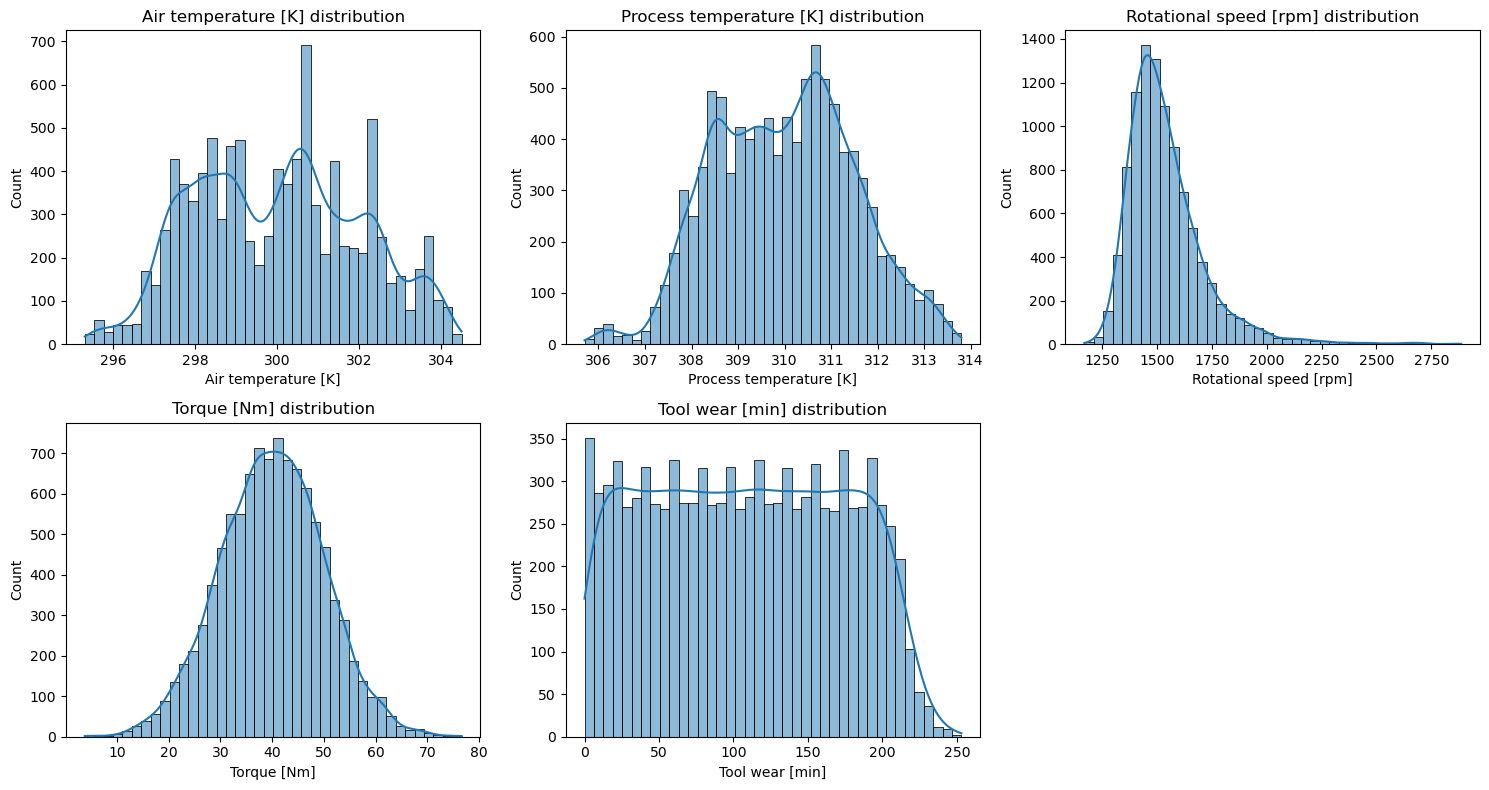

In [134]:
plt.figure(figsize=(15,8))
for i, c in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[c],kde=True,bins=40)
    plt.title(f"{c} distribution" )
    plt.xlabel(c)
plt.tight_layout()
plt.show()


* feature(numeric) vs target (bivariate analysis)

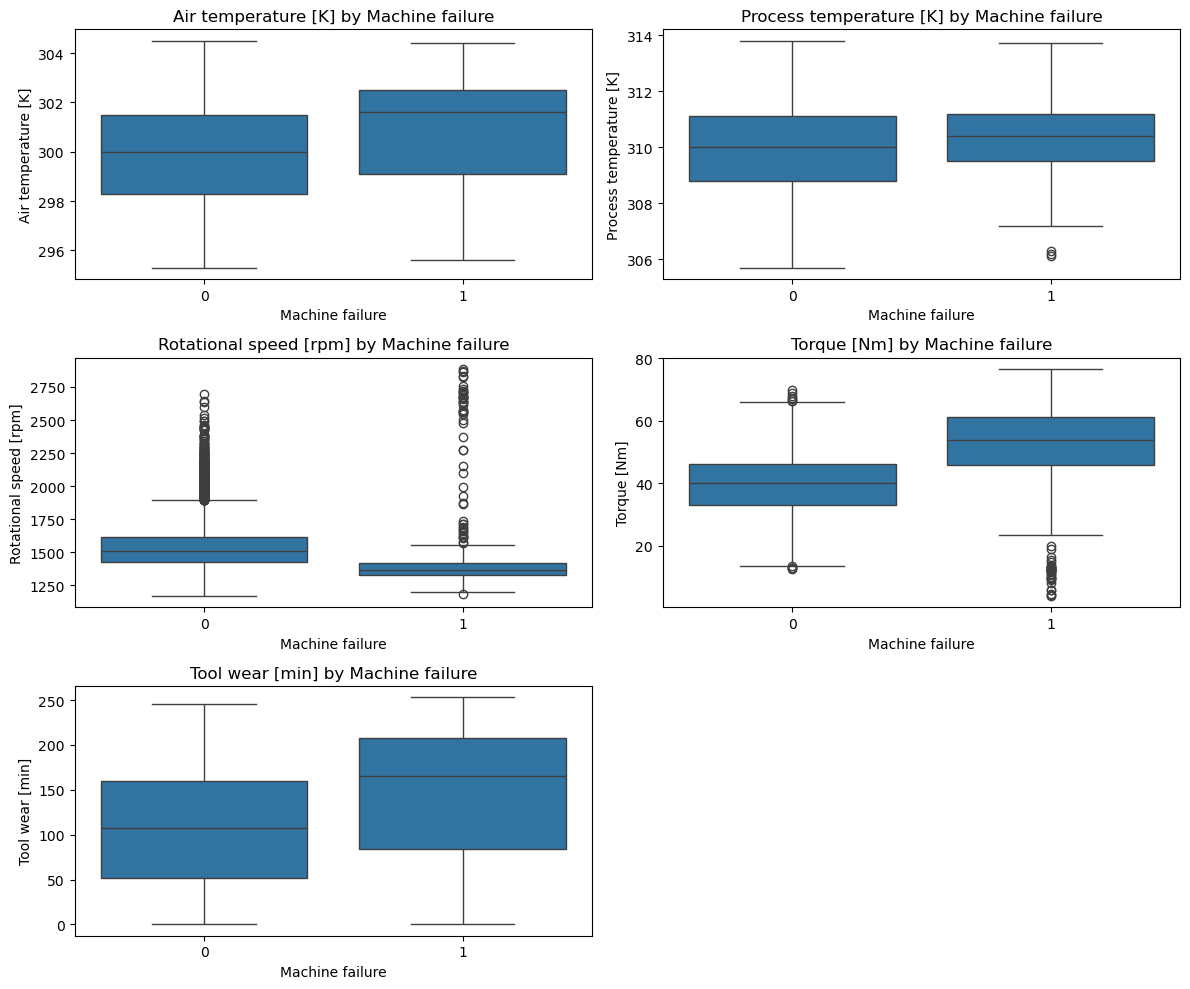

In [135]:
plt.figure(figsize=(12,10))
for i,c in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.boxplot(x="Machine failure",y=c,data=df)
    plt.title(f"{c} by Machine failure")
plt.tight_layout()
plt.show()

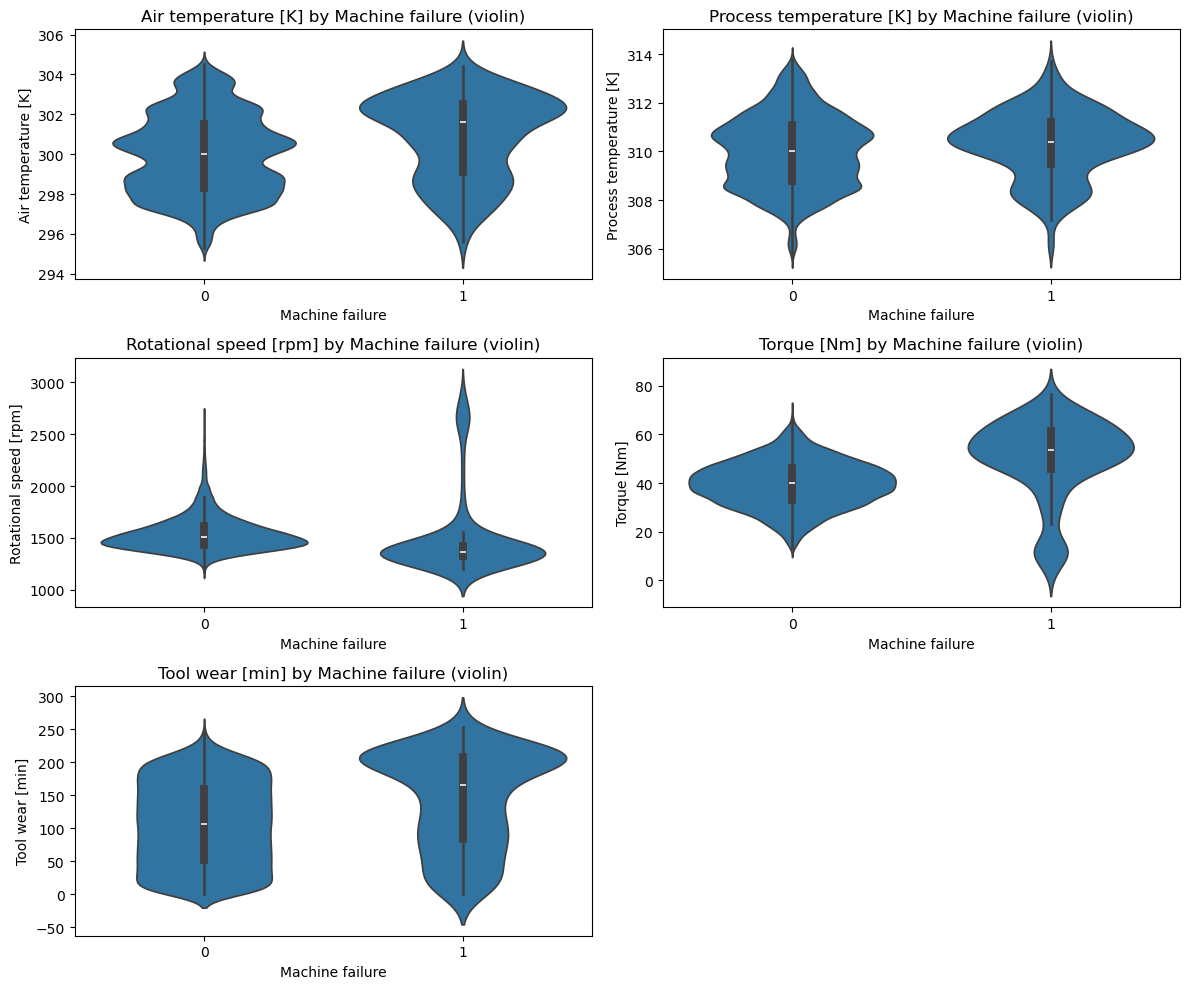

In [136]:
plt.figure(figsize=(12,10))
for i,c in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.violinplot(x="Machine failure",y=c,data=df)
    plt.title(f"{c} by Machine failure (violin)")
plt.tight_layout()
plt.show()

* Feature(categorical - type) vs target

In [137]:
ct = pd.crosstab(df["Type"],df["Machine failure"])
ct_pct = ct.div(ct.sum(axis=1),axis=0)
ct_pct


Machine failure,0,1
Type,,
H,0.979063,0.020937
L,0.960833,0.039167
M,0.972306,0.027694


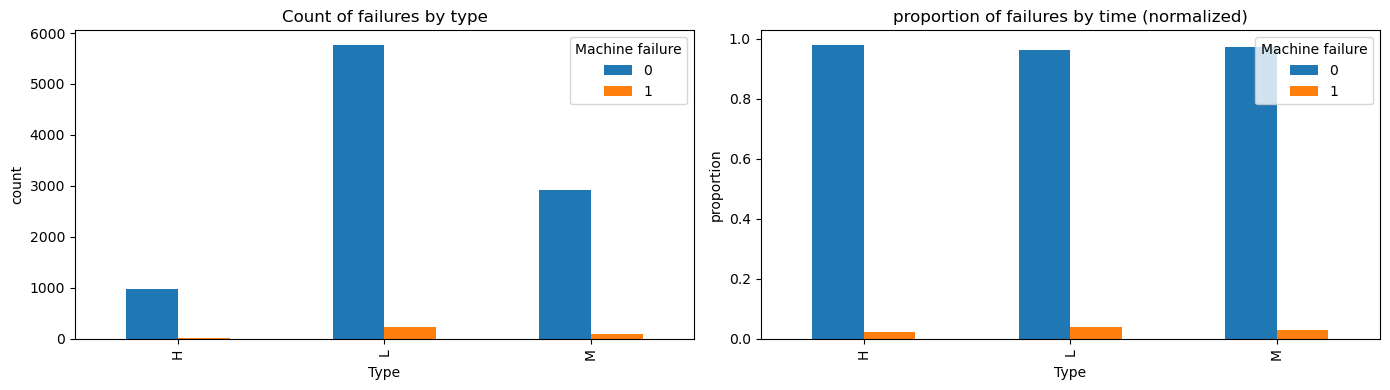

In [138]:
fig,axes = plt.subplots(1,2,figsize=(14,4))
ct.plot(kind="bar",stacked=False,ax=axes[0])
axes[0].set_title("Count of failures by type")
axes[0].set_ylabel("count")

ct_pct.plot(kind="bar",stacked=False,ax=axes[1])
axes[1].set_title("proportion of failures by time (normalized)")
axes[1].set_ylabel("proportion")
plt.tight_layout()
plt.show()

In [139]:
# failure rate per type
round(df.groupby("Type")['Machine failure'].mean(),2)

Type
H    0.02
L    0.04
M    0.03
Name: Machine failure, dtype: float64

* Coorelation matrix (Heatmap)

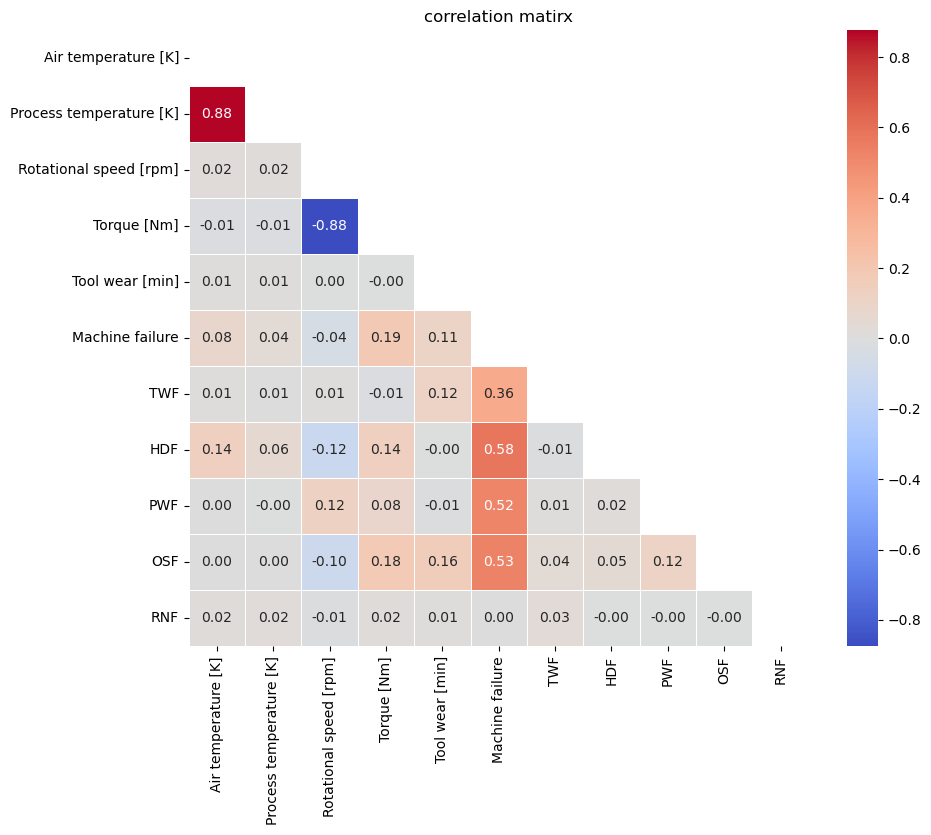

In [140]:
corr = df.corr(numeric_only=True)
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5,mask=mask)
plt.title("correlation matirx")
plt.show()

In [141]:
# grouped summary by Machine failure
grouped_stats=df.groupby("Machine failure")[num_cols].agg(["mean","std","median"])
for col in num_cols:
    print(f"{col} by Machine failure")
    print(grouped_stats[col])
    print("------------------------------------------------------")

Air temperature [K] by Machine failure
                       mean       std  median
Machine failure                              
0                299.973999  1.990748   300.0
1                300.886431  2.071473   301.6
------------------------------------------------------
Process temperature [K] by Machine failure
                       mean       std  median
Machine failure                              
0                309.995570  1.486846   310.0
1                310.290265  1.363686   310.4
------------------------------------------------------
Rotational speed [rpm] by Machine failure
                        mean         std  median
Machine failure                                 
0                1540.260014  167.394734  1507.0
1                1496.486726  384.943547  1365.0
------------------------------------------------------
Torque [Nm] by Machine failure
                      mean        std  median
Machine failure                              
0                39.6296

* Pairplot

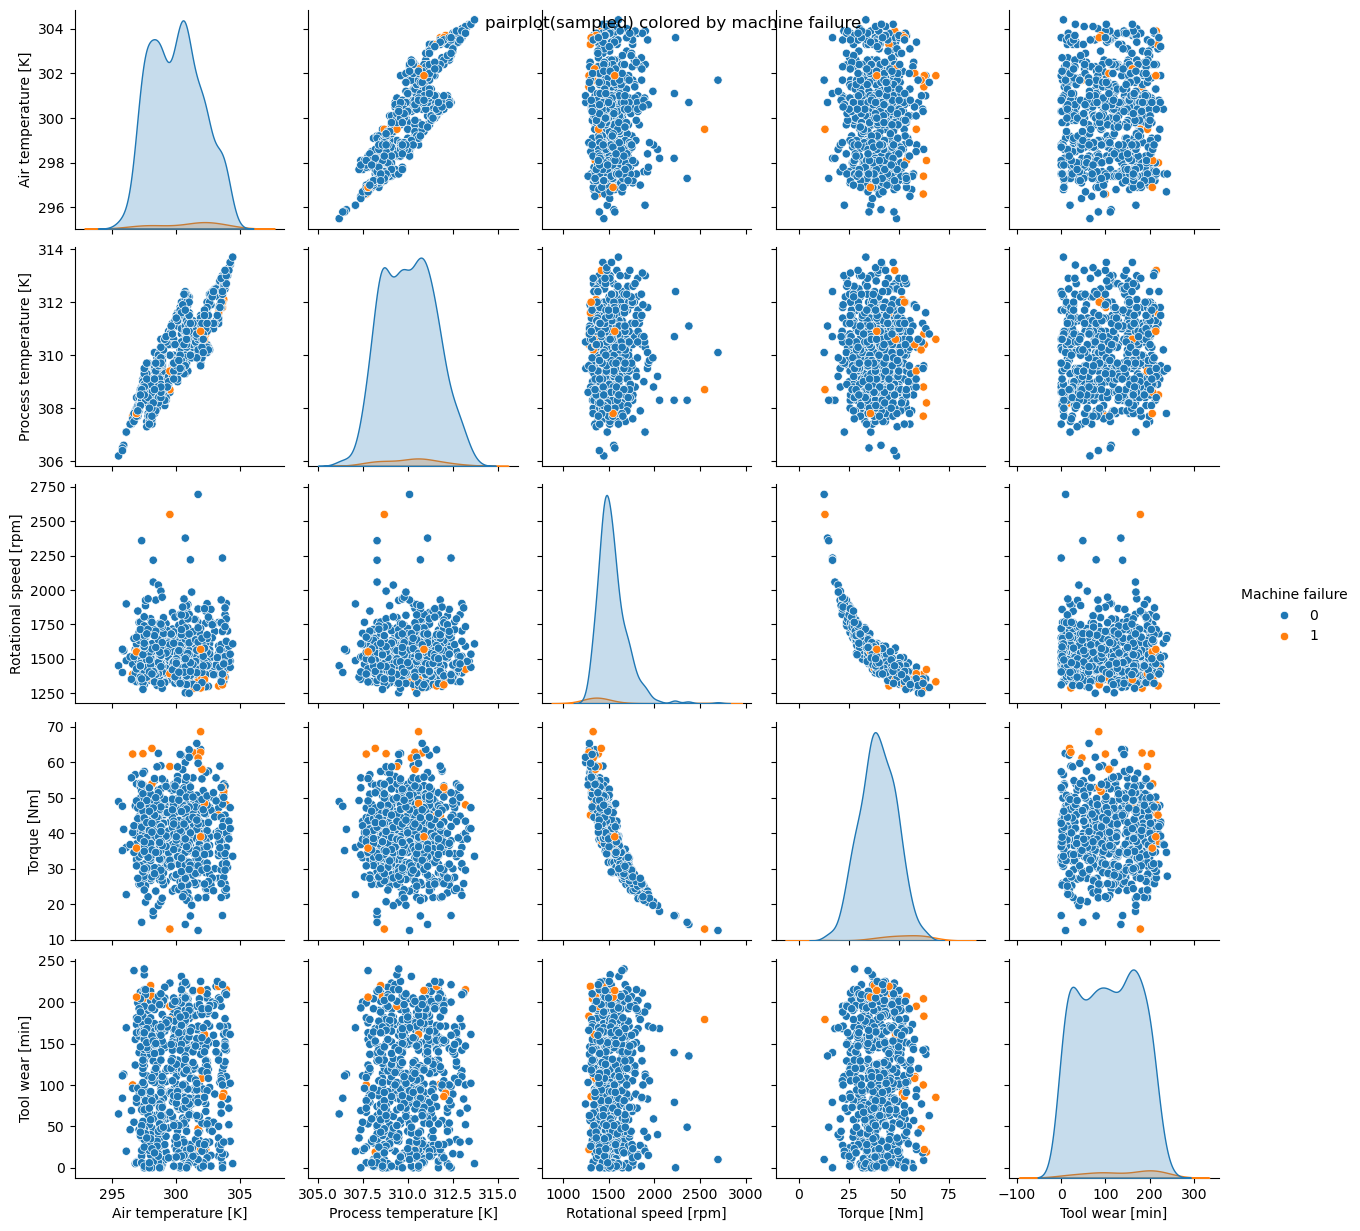

In [142]:
# we take sample beacause 10k rows is too heavy
sample = df.sample(700,random_state=42)
sns.pairplot(sample[num_cols+["Machine failure"]],hue="Machine failure")
plt.suptitle("pairplot(sampled) colored by machine failure")
plt.show()


* Multi Label Failure Analysis

Text(0.5, 1.0, 'Co-occurance matrix of failure types(counts)')

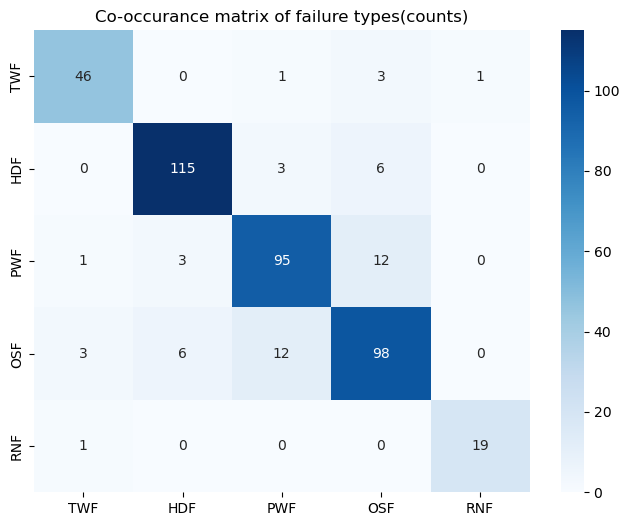

In [143]:
# which failure types often occur together # useful for multi-label modelling
labels = df[failure_cols]
cooc = labels.T.dot(labels)
plt.figure(figsize=(8,6))
sns.heatmap(cooc,annot=True,fmt="d",cmap="Blues")
plt.title("Co-occurance matrix of failure types(counts)")

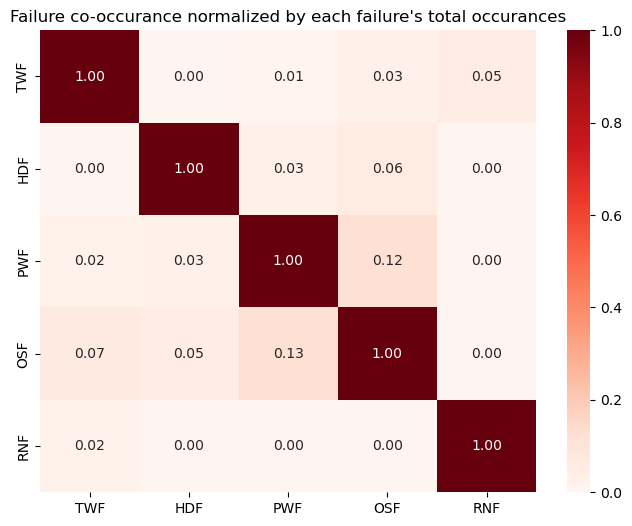

In [144]:
# Failure co-occurance normalized by each failure's total occurances
cooc_prop=cooc.copy()
for col in cooc_prop.columns:
    if cooc_prop.loc[col,col]>0:
        cooc_prop[col] = cooc_prop[col]/cooc_prop.loc[col,col]

plt.figure(figsize=(8,6))
sns.heatmap(cooc_prop,annot=True,fmt=".2f",cmap="Reds")
plt.title("Failure co-occurance normalized by each failure's total occurances")
plt.show()

In [145]:
# how many rows have 0,1,2,3 etc failure types
labels.sum(axis=1).value_counts().sort_index()

0    9652
1     324
2      23
3       1
Name: count, dtype: int64

In [146]:
# inspect failed rows
print("Examples of failed rows")
display(df[df["Machine failure"]==1].head(10))

Examples of failed rows


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
168,L,298.4,308.3,1433,62.3,20,1,0,0,1,0,0
194,M,298.2,308.5,2678,10.7,86,1,0,0,1,0,0
207,M,298.4,308.7,1421,60.7,119,1,0,0,1,0,0
242,L,298.0,308.2,1348,58.8,202,1,0,0,0,1,0
248,L,298.0,308.3,1362,56.8,216,1,0,0,0,1,0


### Data Preprocessing and Feature Engineering

In [147]:
# Encode categorical variables (Type)
df_encoded = pd.get_dummies(df,columns=["Type"],drop_first=True,dtype="int")
print("columns after encoding")
print(df_encoded.columns)
print("---------------------------------------------------------")
print(df_encoded.head())

columns after encoding
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_L',
       'Type_M'],
      dtype='object')
---------------------------------------------------------
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         42.8                0                0    0    0    0    0    0   
1         46.3                3                0    0    0    0    0    0   
2 

In [148]:
# Define Features(X) and traget(y)
# we will remove the subtypes beacuasue they are subtypes of traget (including them in input makes no sense)
X = df_encoded.drop(columns = ["Machine failure","TWF","HDF","PWF","OSF","RNF"])
y=df_encoded["Machine failure"]

In [149]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,1,0
2,298.1,308.5,1498,49.4,5,1,0
3,298.2,308.6,1433,39.5,7,1,0
4,298.2,308.7,1408,40.0,9,1,0


In [150]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [151]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 7)
(8000,)
(2000, 7)
(2000,)


In [152]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[0])
print(X_test_scaled[0])

[ 0.99891359  0.60428162 -0.46060741  0.71830476 -0.84399726 -1.23436595
  1.53620728]
[ 0.24768129 -0.13929361 -1.07396322  2.2653778   0.71241009  0.81013252
 -0.65095382]


In [153]:
# Handle Imbalance with smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced,y_train_balanced = smote.fit_resample(X_train_scaled,y_train)
print("Befor SMOTE :",y_train.value_counts())
print("After SMOTE :",y_train_balanced.value_counts())

Befor SMOTE : Machine failure
0    7729
1     271
Name: count, dtype: int64
After SMOTE : Machine failure
0    7729
1    7729
Name: count, dtype: int64


c:\Users\kanha\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Model Training

In [154]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_balanced,y_train_balanced)

LogisticRegression(random_state=42)

In [155]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(n_estimators=200, random_state=42)

In [156]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=6,random_state=42)
xgb.fit(X_train_balanced,y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [157]:
# Logistic Regression Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]

# Random forest predictions
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]

# XGBclassifier predictions
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:,1]

In [158]:
# Evaluation Metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

# Logistic Regression
print("Logistic Regression Results")
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))
print("ROC-AUC:",roc_auc_score(y_test,y_prob_log))
print("Accurcay score:",accuracy_score(y_test,y_pred_log))
print("**************************************************************************************************")
# Random Forest
print("Random Forest Results")
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print("ROC-AUC:",roc_auc_score(y_test,y_prob_rf))
print("Accurcay score:",accuracy_score(y_test,y_pred_rf))
print("**************************************************************************************************")
# xgboost
print("xgboost Results")
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print("ROC-AUC:",roc_auc_score(y_test,y_prob_xgb))
print("Accurcay score:",accuracy_score(y_test,y_pred_xgb))

Logistic Regression Results
[[1603  329]
 [  12   56]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1932
           1       0.15      0.82      0.25        68

    accuracy                           0.83      2000
   macro avg       0.57      0.83      0.58      2000
weighted avg       0.96      0.83      0.88      2000

ROC-AUC: 0.9078294361222751
Accurcay score: 0.8295
**************************************************************************************************
Random Forest Results
[[1883   49]
 [  17   51]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.51      0.75      0.61        68

    accuracy                           0.97      2000
   macro avg       0.75      0.86      0.79      2000
weighted avg       0.97      0.97      0.97      2000

ROC-AUC: 0.9712162038728535
Accurcay score: 0.967
******************************************

### Feature Importance

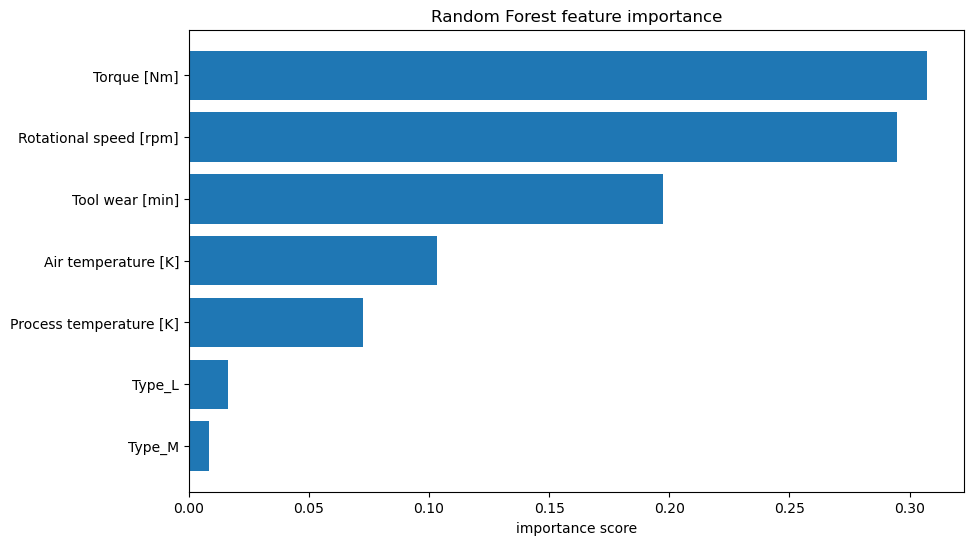

In [159]:
# get feature importance scores
importances = rf.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()

# plot feature importance
plt.figure(figsize= (10,6))
plt.barh(feature_names[sorted_idx],importances[sorted_idx])
plt.title("Random Forest feature importance")
plt.xlabel("importance score")
plt.show()

### Save the model

In [160]:
# we will save the random forest model as it is easy to deploy and also all the models are working same
import joblib
joblib.dump(rf,"xgb_model.pkl")
joblib.dump(scaler,"scaler.pkl") # save the scaler too as we need it in inference time too

['scaler.pkl']

### Multi-Label Prediction
* Predict Machine Failure with the cause of Machine Failure (TWF/HDF/PWF/OSF/RNF) or mixture of these

In [161]:
# Filter only machines that failed for multi-output training
df_failures = df_encoded[df_encoded["Machine failure"]==1]

In [162]:
# Define X and y
X_multi = df_encoded.drop(columns = ["Machine failure","TWF","HDF","PWF","OSF","RNF"])
y_multi = df_encoded[["TWF","HDF","PWF","OSF","RNF"]]
print(X.head())
print("----------------------------------------------------------------")
print(y.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Type_L  Type_M  
0         42.8                0       0       1  
1         46.3                3       1       0  
2         49.4                5       1       0  
3         39.5                7       1       0  
4         40.0                9       1       0  
----------------------------------------------------------------
0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64


In [163]:
# Train test split
X_train_multi,X_test_multi,y_train_multi,y_test_multi = train_test_split(X_multi,y_multi,test_size=0.2,random_state=42)
print(X_train_multi.shape)
print(X_test_multi.shape)
print(y_train_multi.shape)
print(y_test_multi.shape)

(8000, 7)
(2000, 7)
(8000, 5)
(2000, 5)


In [164]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_multi = scaler.fit_transform(X_train_multi)
X_test_scaled_multi = scaler.transform(X_test_multi)
print(X_train_scaled_multi[0])
print(X_test_scaled_multi[0])

[-0.85406604 -0.60958879  0.42763418 -0.89269644  1.37503539  0.82160932
 -0.65894295]
[ 0.39462329  0.19773561 -0.00430066 -0.39162073  1.4224879   0.82160932
 -0.65894295]


In [165]:
# Train a multiple output classifier with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

xgb_multi = XGBClassifier(n_estimators=300,random_state=42,learning_rate=0.05,max_depth=6,class_weight="balanced")
multi_clf = MultiOutputClassifier(xgb_multi)
multi_clf.fit(X_train_scaled_multi,y_train_multi)

C:\Users\kanha\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:09:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kanha\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:09:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              class_weight='balanced',
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None, ...))

In [166]:
# Evaluate
from sklearn.metrics import classification_report,accuracy_score
y_pred_multi = multi_clf.predict(X_test_scaled_multi)
print(classification_report(y_test_multi,y_pred_multi,target_names=y_multi.columns))

              precision    recall  f1-score   support

         TWF       0.67      0.18      0.29        11
         HDF       1.00      0.94      0.97        17
         PWF       0.88      0.75      0.81        20
         OSF       0.93      0.78      0.85        18
         RNF       0.00      0.00      0.00         6

   micro avg       0.92      0.65      0.76        72
   macro avg       0.70      0.53      0.58        72
weighted avg       0.82      0.65      0.71        72
 samples avg       0.02      0.02      0.02        72



c:\Users\kanha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanha\anaconda3\Lib\site-packages\sklea

In [168]:
print(accuracy_score(y_test_multi,y_pred_multi))

0.9855


### Inference Logic

In [169]:
def predict_failure_and_type(x_input):
    # ensure input is a 2D array
    x_input = np.array(x_input).reshape(1, -1)
    
    # step 1: predict binary
    failure_pred = rf.predict(x_input)[0]
    if failure_pred == 0:
        return {"Machine failure": 0, "failure type": None}
    else:
        # step 2: Predict subtypes
        subtype_pred = multi_clf.predict(x_input)[0]
        subtype_labels = y.columns[subtype_pred == 1].tolist()
        return {"Machine failure": 1, "failure type":subtype_labels}

In [170]:
predict_failure_and_type([0.99891359,  0.60428162, -0.46060741,  0.71830476, -0.84399726, -0.06723349,
 -0.10424403])

{'Machine failure': 0, 'failure type': None}

### Save the multi-class model

In [171]:
joblib.dump(multi_clf,"multi_clf.pkl")
joblib.dump(scaler,"scaler_multi.pkl")

['scaler_multi.pkl']

In [ ]:
##########################